# Logistic Regression

In [23]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
## Load the training data into feature matrix, class labels, and event ids:

In [25]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Features Preparation
 * Standardization
 * PCA ( TODO )
 * Polynomial basis

In [30]:
from helpers import standardize
# Standardization
tx_norm, mean_x, std_x = standardize(tX)

## Output translation
y must be 0 or 1

In [31]:
y[y == -1] = 0

## Parameter Optimization

In [38]:
from cross_validation import *

k_fold = 4
nbPoints = 30
gammas = np.logspace(-30, -5, nbPoints)
losses_tr = []
losses_te = []

print("Gammas: {}".format(gammas))

Gammas: [  1.00000000e-30   7.27895384e-30   5.29831691e-29   3.85662042e-28
   2.80721620e-27   2.04335972e-26   1.48735211e-25   1.08263673e-24
   7.88046282e-24   5.73615251e-23   4.17531894e-22   3.03919538e-21
   2.21221629e-20   1.61026203e-19   1.17210230e-18   8.53167852e-18
   6.21016942e-17   4.52035366e-16   3.29034456e-15   2.39502662e-14
   1.74332882e-13   1.26896100e-12   9.23670857e-12   6.72335754e-11
   4.89390092e-10   3.56224789e-09   2.59294380e-08   1.88739182e-07
   1.37382380e-06   1.00000000e-05]


In [39]:
i = 0    
for gamma in gammas:
    i = i + 1
    print("Step", i, "over", nbPoints, "| gamma: ", gamma)
    loss_train = []
    loss_test = []
    initial_w = np.zeros((tx_norm.shape[1]))
     
    for k in range (k_fold):
        loss_tr, loss_te = cross_validation(y, tx_norm, k_fold, k, 0, initial_w, gamma, "logistic_regression")
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
        
    
    # rmse of the mean mse
    loss_tr = np.sum(loss_train, axis=0)/k_fold
    loss_te = np.sum(loss_test, axis=0)/k_fold
    losses_tr.append(loss_tr)
    losses_te.append(loss_te)
    print("  -> loss_tr: {}\n  -> loss_te: {}".format(loss_tr, loss_te))



Step 1 over 30 | gamma:  1e-30
7.95427862528e-26
7.95427862528e-26
7.94568766772e-26
7.94568766772e-26
7.98595292447e-26
7.98595292447e-26
7.97859286184e-26
7.97859286184e-26
  -> loss_tr: 129965.09635498974
  -> loss_te: 43321.69878499658
Step 2 over 30 | gamma:  7.27895384398e-30
5.78988269756e-25
5.78988269756e-25
5.7836293792e-25
5.78362937921e-25
5.81293827374e-25
5.81293827374e-25
5.80758091813e-25
5.80758091813e-25
  -> loss_tr: 129965.09635498974
  -> loss_te: 43321.69878499658
Step 3 over 30 | gamma:  5.29831690628e-29
4.21442889176e-24
4.21442889176e-24
4.20987713019e-24
4.20987713019e-24
4.23121093925e-24
4.23121093925e-24
4.22731134483e-24
4.22731134483e-24
  -> loss_tr: 129965.09635498974
  -> loss_te: 43321.69878499658
Step 4 over 30 | gamma:  3.85662042116e-28
3.06766333819e-23
3.06766333819e-23
3.06435013195e-23
3.06435013195e-23
3.0798789131e-23
3.0798789131e-23
3.07704041631e-23
3.07704041631e-23
  -> loss_tr: 129965.09635498974
  -> loss_te: 43321.69878499658
Step 5 

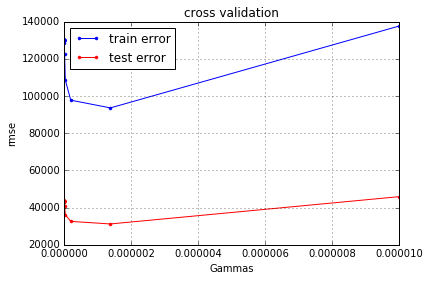

In [40]:
plt.plot(gammas, losses_tr, marker=".", color='b', label='train error')
plt.plot(gammas, losses_te, marker=".", color='r', label='test error')
plt.xlabel("Gammas")
plt.ylabel("rmse")
plt.title("cross validation")
plt.legend(loc=2)
plt.grid(True)
plt.savefig("cross_validation")